In [105]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [153]:

def sampleing_data(type : str = "train"):
    img_path = []
    img_dir = "./data/" + type
    length = len(os.listdir(img_dir))
    idx = np.random.randint(0, length, 6)

    if type == "train":
        img_class_dir = [img_dir + "/" + x for x in np.array(os.listdir(img_dir))[idx]]
        for x in img_class_dir:
            img_idx = np.random.randint(0, len(os.listdir(x)))
            img_name = os.listdir(x)[img_idx]
            img_path.append(x + "/" + img_name)
    else:
        img_path = [img_dir + "/" + img_name for img_name in np.array(os.listdir(img_dir))[idx]]
    return img_path

In [154]:
def show_image(img_path):
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        axes[idx//3][idx % 3].imshow(data, cmap='gray')

In [155]:
def gaussian_noise(img_path, maxValue, block_size, c):
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        gaussian_img = cv2.adaptiveThreshold(data, maxValue, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c)

        axes[idx//3][idx % 3].imshow(gaussian_img, cmap='gray')

In [156]:
def canny(img_path, th1, th2):
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        edges = cv2.Canny(data, th1, th2)

        axes[idx//3][idx % 3].imshow(edges, cmap='gray')

In [157]:
def sharpening(img_path, median): 
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))
    f = np.zeros((3, 3)) - 1
    f[1][1] = median

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        sharpening = cv2.filter2D(data, -1, f)

        axes[idx//3][idx % 3].imshow(sharpening, cmap='gray')

In [202]:
def threshold_otsu(img_path): 
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # data = cv2.GaussianBlur(data, (0, 0), 1)
        data = cv2.Canny(data, 100, 100)
        t, otsu_img = cv2.threshold(data, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

        axes[idx//3][idx % 3].imshow(otsu_img, cmap='gray')
        axes[idx//3][idx % 3].set_title(f"threshold_{t}")

In [160]:
def gaussian_blur(img_path, sigma_value, kernal_size = (0, 0)):
    fig, axes = plt.subplots(int(np.ceil(len(img_path) / 3)), 3, figsize=(12, 7))

    for idx, path in enumerate(img_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        gaussian_blur_img = cv2.GaussianBlur(data, kernal_size, sigma_value)

        axes[idx//3][idx % 3].imshow(gaussian_blur_img, cmap='gray')

In [195]:
# img_path = sampleing_data("test")
img_path = ["./data/test/6009.JPEG", "./data/test/6010.JPEG", "./data/test/5972.JPEG", "./data/test/5950.JPEG", "./data/test/5944.JPEG", "./data/test/5937.JPEG"]

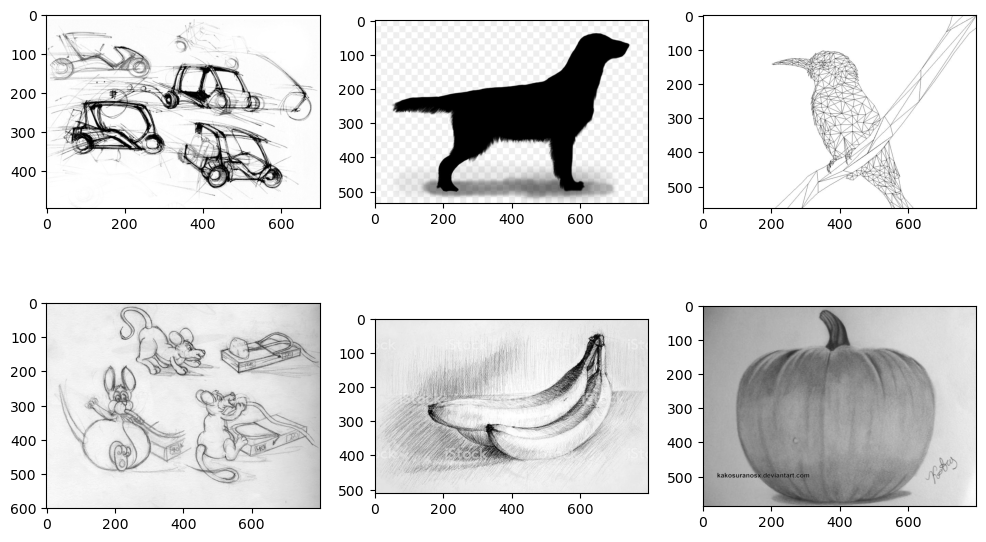

In [196]:
show_image(img_path)

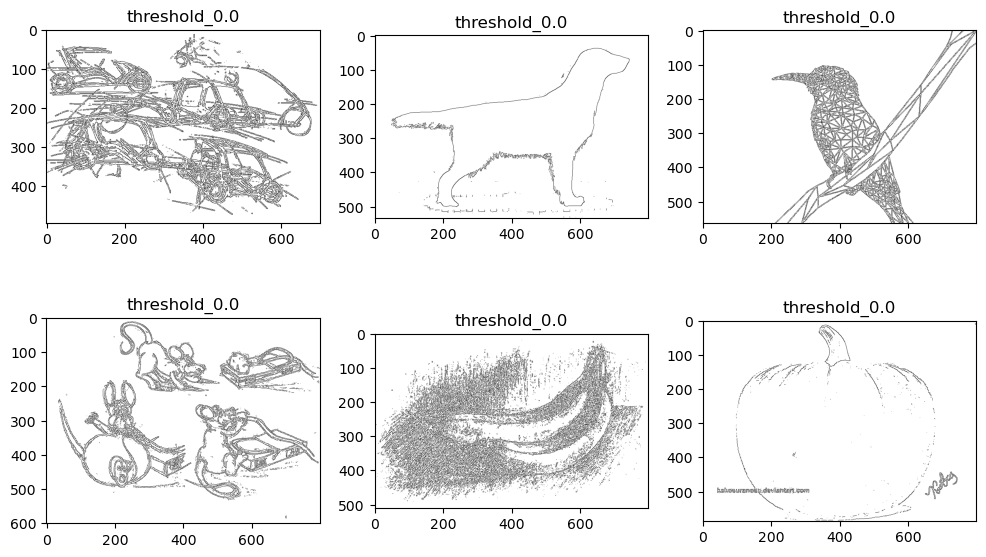

In [203]:
threshold_otsu(img_path)